# Historical Volatility & Risk-Return Ratios

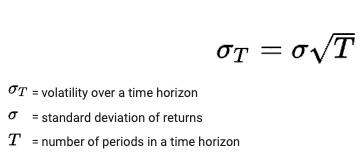

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np

# from pandas_datareader import data as pdr
import  pandas_datareader.data as web
import yfinance as yf
yf.pdr_override()

In [ ]:
import plotly.offline as pyo # interactive plot
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected= True)
pd.options.plotting.backend = 'plotly'
import plotly.io as pio 
pio.renderers.default = "colab"

In [ ]:
# Get stock data
end= dt.datetime.now()
start = dt.datetime(2015,1,1)
start, end

(datetime.datetime(2015, 1, 1, 0, 0),
 datetime.datetime(2023, 3, 7, 23, 15, 42, 766828))

In [ ]:
stockList = ['^GSPC', 'AAPL','GOOG','NVDA', 'TXN']
stocks = [stock for stock in stockList]

In [ ]:
df = web.get_data_yahoo(stocks,start,end)

[*********************100%***********************]  5 of 5 completed


In [ ]:
df

Adj Close                                                  \
                  AAPL       GOOG        NVDA         TXN        ^GSPC   
Date                                                                     
2015-01-02   24.565691  26.168653    4.834948   43.017502  2058.199951   
2015-01-05   23.873640  25.623152    4.753286   42.349888  2020.579956   
2015-01-06   23.875889  25.029282    4.609176   41.650066  2002.609985   
2015-01-07   24.210684  24.986401    4.597164   42.398144  2025.900024   
2015-01-08   25.140905  25.065184    4.770100   43.089893  2062.139893   
...                ...        ...         ...         ...          ...   
2023-03-01  145.309998  90.510002  226.979996  172.169998  3951.389893   
2023-03-02  145.910004  92.309998  233.139999  174.080002  3981.350098   
2023-03-03  151.029999  94.019997  238.899994  175.679993  4045.639893   
2023-03-06  153.830002  95.580002  235.539993  173.050003  4048.419922   
2023-03-07  151.600006  94.169998  232.880005  172.059998  3986.370117   

                 Close                                                  ...  \
                  AAPL       GOOG        NVDA         TXN        ^GSPC  ...   
Date                                                                    ...   
2015-01-02   27.332500  26.168653    5.032500   53.480000  2058.199951  ...   
2015-01-05   26.562500  25.623152    4.947500   52.650002  2020.579956  ...   
2015-01-06   26.565001  25.029282    4.797500   51.779999  2002.609985  ...   
2015-01-07   26.937500  24.986401    4.785000   52.709999  2025.900024  ...   
2015-01-08   27.972500  25.065184    4.965000   53.570000  2062.139893  ...   
...                ...        ...         ...         ...          ...  ...   
2023-03-01  145.309998  90.510002  226.979996  172.169998  3951.389893  ...   
2023-03-02  145.910004  92.309998  233.139999  174.080002  3981.350098  ...   
2023-03-03  151.029999  94.019997  238.899994  175.679993  4045.639893  ...   
2023-03-06  153.830002  95.580002  235.539993  173.050003  4048.419922  ...   
2023-03-07  151.600006  94.169998  232.880005  172.059998  3986.370117  ...   

                  Open                                                  \
                  AAPL       GOOG        NVDA         TXN        ^GSPC   
Date                                                                     
2015-01-02   27.847500  26.378078    5.032500   53.560001  2058.899902   
2015-01-05   27.072500  26.091366    5.032500   53.189999  2054.439941   
2015-01-06   26.635000  25.679497    4.955000   52.889999  2022.150024   
2015-01-07   26.799999  25.280592    4.832500   52.009998  2005.550049   
2015-01-08   27.307501  24.831326    4.840000   53.130001  2030.609985   
...                ...        ...         ...         ...          ...   
2023-03-01  146.830002  90.160004  231.919998  171.039993  3963.340088   
2023-03-02  144.380005  89.860001  224.880005  171.130005  3938.679932   
2023-03-03  148.039993  92.739998  233.199997  175.000000  3998.020020   
2023-03-06  153.789993  94.360001  238.910004  175.289993  4055.149902   
2023-03-07  153.699997  94.360001  236.000000  172.770004  4048.260010   

               Volume                                           
                 AAPL      GOOG      NVDA      TXN       ^GSPC  
Date                                                            
2015-01-02  212818400  28951268  11368000  4020100  2708700000  
2015-01-05  257142000  41196796  19795200  5599300  3799120000  
2015-01-06  263188400  57998800  19776400  5468400  4460110000  
2015-01-07  160423600  41301082  32180800  4577100  3805480000  
2015-01-08  237458000  67071641  28378000  6295200  3934010000  
...               ...       ...       ...      ...         ...  
2023-03-01   55479000  26323900  46002600  4649800  4249480000  
2023-03-02   52238100  23328600  38941500  4551100  4244900000  
2023-03-03   70668500  30220900  41168400  4379200  4084730000  
2023-03-06   87410100  28272600  43695300  4089800  

In [ ]:
Close = df.Close
Close.head()

,AAPL,GOOG,NVDA,TXN,^GSPC
Date,,,,,
2015-01-02,27.332500,26.168653,5.0325,53.480000,2058.199951
2015-01-05,26.562500,25.623152,4.9475,52.650002,2020.579956
2015-01-06,26.565001,25.029282,4.7975,51.779999,2002.609985
2015-01-07,26.937500,24.986401,4.7850,52.709999,2025.900024
2015-01-08,27.972500,25.065184,4.9650,53.570000,2062.139893


In [ ]:
# Compute log returns
log_returns = np.log(df.Close/df.Close.shift(1)).dropna()
log_returns

,AAPL,GOOG,NVDA,TXN,^GSPC
Date,,,,,
2015-01-05,-0.028576,-0.021066,-0.017034,-0.015641,-0.018447
2015-01-06,0.000094,-0.023450,-0.030787,-0.016662,-0.008933
2015-01-07,0.013925,-0.001715,-0.002609,0.017801,0.011563
2015-01-08,0.037703,0.003148,0.036927,0.016184,0.017730
2015-01-09,0.001072,-0.013035,0.004020,0.000560,-0.008439
...,...,...,...,...,...
2023-03-01,-0.014348,0.002323,-0.022565,0.004191,-0.004736
2023-03-02,0.004121,0.019692,0.026777,0.011033,0.007554
2023-03-03,0.034488,0.018355,0.024406,0.009149,0.016019


In [ ]:
# Calculate daily standard deviation of returns (volatility)
# Daily
daily_std = log_returns.std()
daily_std

AAPL     0.018839
GOOG     0.018013
NVDA     0.030354
TXN      0.018183
^GSPC    0.011894
dtype: float64

In [ ]:
annualized_vol = daily_std * np.sqrt(252) # Total trading days in a year
annualized_vol * 100 # percentage

AAPL     29.905489
GOOG     28.595520
NVDA     48.184871
TXN      28.864697
^GSPC    18.881151
dtype: float64

In [ ]:
# plot histogram of log returns with annualized volatility
fig = make_subplots(rows = 2, cols = 2)

trace0 = go.Histogram(x = log_returns['AAPL'], name = 'AAPL')
trace1 = go.Histogram(x = log_returns['GOOG'], name = 'GOOG')
trace2 = go.Histogram(x = log_returns['NVDA'], name = 'NVDA')
trace3 = go.Histogram(x = log_returns['TXN'], name = 'TXN')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)

fig.update_layout(autosize = False, width = 1400, height = 800, title = 'Frequency of log returns',
                  xaxis1 = dict(title = 'APPL Annualized Vol: ' + str(np.round(annualized_vol['AAPL'] * 100, 1))),
                  xaxis2 = dict(title = 'GOOG Annualized Vol: ' + str(np.round(annualized_vol['GOOG'] * 100, 1))),
                  xaxis3 = dict(title = 'NVDA Annualized Vol: ' + str(np.round(annualized_vol['NVDA'] * 100, 1))),
                  xaxis4 = dict(title = 'TXN Annualized Vol: ' + str(np.round(annualized_vol['TXN'] * 100, 1)))
                  )


fig.show()

In [ ]:
# Trailing volatility over time
trading_days = 60
volatility = log_returns.rolling(window = trading_days).std() * np.sqrt(trading_days) # , min_periods = 0

In [ ]:
volatility.plot().update_layout(autosize = False, width = 1400, height = 600)

## Ratios



1.   Sharpe ratio

Introduced in 1966 by Nobel laureate William F.Sharpe. The Sharpe ratio is a measure for calculating risk-adjusted return. The higher the Sharpe ratio, the more attractive the risk-adjusted return. As a baseline, a portfolio investing solely in US Treasury bonds would have a Sharpe ratio of 0.

Adding investments that have low correlations to existing investments in a portfolio is designed to decrease the risk of the portfolio without sacrificing the return.

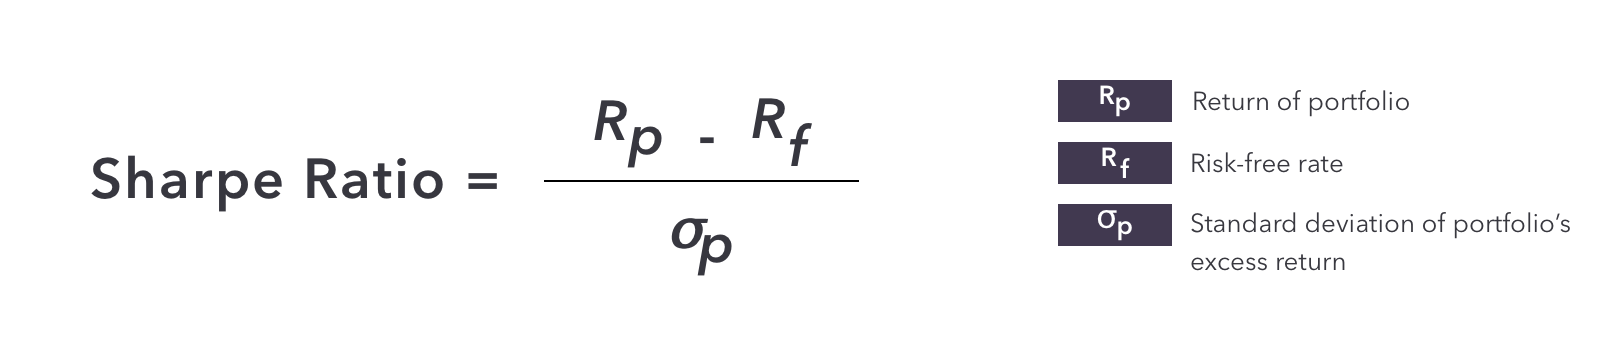

In [ ]:
Risk_free_rate = 0.01
Rf_daily = Risk_free_rate/252
sharpe_ratio = (log_returns.rolling(window = trading_days).mean() - Rf_daily) / volatility * trading_days # if add " min_periods = 0" sharpe_ratio will be very very small. Maybe skip them is better. But, why?
# sharpe_ratio

In [ ]:
sharpe_ratio.plot().update_layout(autosize = False, width = 1400, height = 600)

2.   Sortino ratio

Similar to Sharpe ratio, the difference is that sortino ratio only considers the harmful variance, but the sharpe ratio uses all the observations.

In [ ]:
sortino_vol = log_returns[log_returns < 0].rolling(window = trading_days, center = True, min_periods = 10).std() * np.sqrt(trading_days)

In [ ]:
sortino_vol.plot().update_layout(autosize = False, width = 1400, height = 600)

In [ ]:
sortino_ratio = (log_returns.rolling(window = trading_days).mean() - Rf_daily) / sortino_vol * trading_days

In [ ]:
sortino_ratio.plot().update_layout(autosize = False, width = 1400, height = 600)

3.   Modigliani ratio (M2 ratio)

M2 ratio measures the returns of the portfolio, adjusted for the risk of the portfolio relative to that of some benchmark.

Benchmark volatility, like market index, to benchmark adjusted risk of all this portfolio.

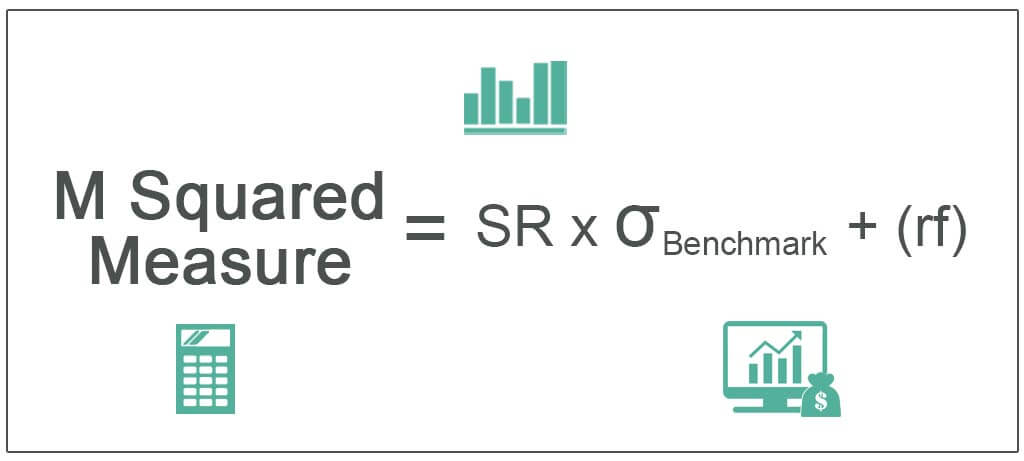

In [ ]:
m2_ratio = pd.DataFrame()

benchmark_vol = volatility['^GSPC']

for c in log_returns.columns:
  if c != '^GSPC':
    m2_ratio[c] = (sharpe_ratio[c] * benchmark_vol/trading_days + Rf_daily) * trading_days


In [ ]:
m2_ratio.plot().update_layout(autosize = False, width = 1400, height = 600)

4.   Max Drawdown

This metric quantifies the steepest decline from peak to trough observed for an investment. This is useful for a number of reasons, mainly the fact that it doesn't rely on the underlying returns being normally distributed.

The cumulative return portfolio over time, what is the maximum drawdown from the peak of our inveestment down to the bottom. What's that percentage max drawdown over our time horizon.

In [ ]:
def max_drawdown(returns):
  cumulative_returns = (1 + returns).cumprod()  # what is cumprod? => Return the cumulative product of elements along a given axis.
  peak = cumulative_returns.expanding(min_periods = 1).max()  # what is expanding? => use this way to expand the series to find the max number. other ways like: sum().
  drawdown = (cumulative_returns / peak) - 1
  return drawdown.min()

In [ ]:
returns = df.Close.pct_change().dropna()

max_drawdowns = returns.apply(max_drawdown, axis = 0) # columns
max_drawdowns * 100

AAPL    -38.729695
GOOG    -44.601850
NVDA    -66.362059
TXN     -30.353818
^GSPC   -33.924960
dtype: float64

*TXN HAS THE SMALLEST MAX DRAWDOWN*

5.   Calmar ratio

This metric uses max drawdown in the denomiantor as opposed to standard deviation.

Calmar ratio uses the above percentages or the absolute percentages and puts them in the context of the return of these stocks. Therefore, instead of getting a return divided by a volatility unit, we're using the volatility unit being these max drawdowns. (why?)

The Calmar ratio uses a fund’s maximum drawdown as its sole measure of risk, which makes it unique. This could also be considered one of its weaknesses.

In [ ]:
calmar_ratio = np.exp(log_returns.mean() * 252) / abs(max_drawdowns)

In [ ]:
calmar_ratio.plot.bar().update_layout(autosize = False, width = 1400, height = 600)

*BUT TXN HAS YIELDED THE LARGEST CALMAR RATIO IN PERSPECTIVE THE RETURNS VERSUS RISK METRIC*